In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy import cos
from math import log

Incidência = Número de casos/(População no meio do período)*5 * 10^5

In [2]:
pop = (78745*10^5)/(5*184030.8)
n(pop)

8557.80662802096

In [3]:
T1=27.4
T2=0.025
omega1=0.67
phi1=1.53
R1=196.9
R2=0.033
omega2=0.65
phi2=1.99

B_E=200
p_ME=0.9
p_ML=0.25
p_MP=0.75
tau_E=1
tau_P=1
c1=0.00554
c2=-0.06737
D1=36.5
b1=0.1
A=-0.03
B=1.31
C=-4.4
b2=0.3
tau_H=10
DD=105
Tmin=14.5
gamma= 1/365
R_L = 50
N=8558
M= 10000  #0
I_M0=5000 #0 # None
I_H0=1000 
if I_M0 is None:
        I_M0 = M / 100

S_H0 = N - I_H0

In [4]:
print(f'População suscetível inicial: {S_H0} \nPopulação infectada inicial: {I_H0}')

População suscetível inicial: 7558 
População infectada inicial: 1000


In [5]:
ratio = M/N
n(ratio)

1.16849731245618

In [6]:
def lotkavolterra(t, z, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0):
    S, I, R = z
    
    # Funções de temperatura e chuva
    def T(t):
        return T1 * (1 + T2 * cos(omega1 * t - phi1))

    def R(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))

    # Duração da fase de desenvolvimento das larvas
    def tau_L(T):
        return 1 / (c1 * T + c2)
    
    # Taxa diária de sobrevivência dos mosquitos
    def p(T):
        return np.exp(-1 / (A*T**2 + B*T + C))
    
    # Probabilidade de sobrevivência das larvas dependente de temperatura e chuva
    def p_LT(T):
        return np.exp(-(c1 * T + c2))
    
    def p_LR(R):
        return (4*p_ML/R_L**2) * R * (R_L - R)
    
    def p_LRT(R,T):
        return p_LR(R)*p_LT(T)
    
    # Probabilidade de sobrevivência dos ovos e pupas dependente de chuva (Não definido previamente)
    def p_ER(R):
        return (4*p_ME/R_L**2) * R * (R_L - R)
    
    # Probabilidade de sobrevivência dos ovos e pupas dependente de chuva (Não definido previamente)
    def p_PR(R):
        return (4*p_MP/R_L**2) * R * (R_L - R)

    # Duração do ciclo esporogônico
    def tau_M(T):
        return DD / (T - Tmin)

    # Definindo a função de sobrevivência do mosquito
    def l(tau_M, T):  
        p_T = p(T)
        return p_T**tau_M

    # Definindo a taxa de mortalidade do mosquito
    def mu(T):
        return -log(p(T))

    R_curr = R(t)
    T_curr = T(t)
    
    # Calcula a taxa de mordida e probabilidade de transmissão
    def a(T):
        return (T_curr - T1) / D1
    
    a_curr = a(T_curr)
    
    def b(R,T):
        return B_E * p_ME * p_LRT(R_curr,T_curr) * p_MP / (tau_E + tau_L(T_curr) + tau_P)
    
    dSdt = -a_curr * b2 * (I_M0 / N) * S
    dIdt = a_curr * b2 * (I_M0 / N) * S - gamma * I
    dRdt = gamma * I
    
    return [dSdt, dIdt, dRdt] 

In [7]:
args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0)

sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, 0], args=args, dense_output=True)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 428
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x6fff38274890>
   status: 0
  success: True
        t: array([0.00000000e+00, 5.16187658e-04, 5.67806424e-03, 5.72968300e-02,
       5.73484488e-01, 4.36270309e+00, 1.15445410e+01, 1.93260132e+01,
       2.72337143e+01, 3.57280311e+01, 4.52647700e+01, 5.48241369e+01,
       6.49957743e+01, 7.36355087e+01, 8.22752430e+01, 8.97817848e+01,
       9.68648506e+01, 1.06666908e+02, 1.16266257e+02, 1.24253974e+02,
       1.32241691e+02, 1.39783472e+02, 1.48132643e+02, 1.55272245e+02,
       1.62112418e+02, 1.73694948e+02, 1.81151057e+02, 1.88607166e+02,
       1.95883788e+02, 2.04050896e+02, 2.10827539e+02, 2.17517147e+02,
       2.25211255e+02, 2.32492874e+02, 2.39611694e+02, 2.46172669e+02,
       2.53462907e+02, 2.60497681e+02, 2.71416252e+02, 2.79053531e+02,
       2.85456514e+02, 2.91859496e+02, 2.98732532

In [8]:
times = sol.t
S, I, R = sol.y

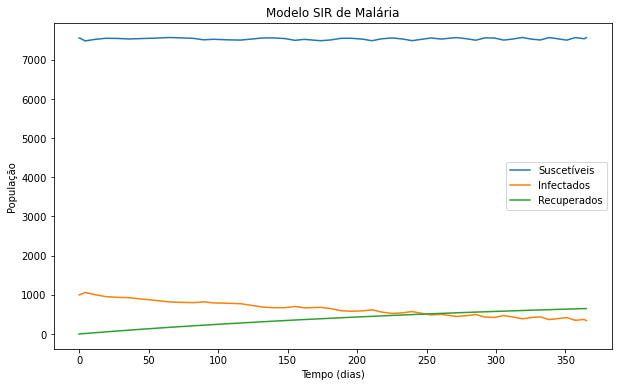

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(times, S, label='Suscetíveis')
plt.plot(times, I, label='Infectados')
plt.plot(times, R, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

In [10]:
# Funções de temperatura e chuva fora do contexto da função lotkavolterra
def T(t):
        return T1 * (1 + T2 * cos(omega1 * t - phi1))

def R(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))

# Duração do ciclo esporogônico fora do contexto da função lotkavolterra
def tau_M(T):
    return DD / (T - Tmin)

# Taxa diária de sobrevivência dos mosquitos
def p(T):
    return np.exp(-1 / (A*T**2 + B*T + C))

# Função de sobrevivência do mosquito
def l(tau_M, T):  
    p_T = p(T)
    return p_T**tau_M

# Taxa de mortalidade do mosquito
def mu(T):
    return -np.log(p(T))

# Taxa de mordida
def a(T):
    return (T - T1) / D1

# Calcula a^2, l e mu ao longo do tempo
l_values = [l(tau_M(T(t)), T(t)) for t in times]
mu_values = [mu(T(t)) for t in times]
a2_values = [(a(T(t)))^2 for t in times]

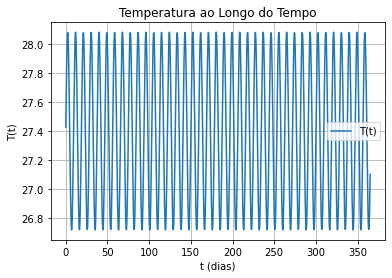

In [11]:
# Pontos no tempo
t_values = np.linspace(0, 365, 1000) # 1000 pontos entre 0 e 365
T_values = [T(t) for t in t_values]

# Plotando
plt.plot(t_values, T_values, label='T(t)')
plt.title('Temperatura ao Longo do Tempo')
plt.xlabel('t (dias)')
plt.ylabel('T(t)')
plt.legend()
plt.grid(True)
plt.show()

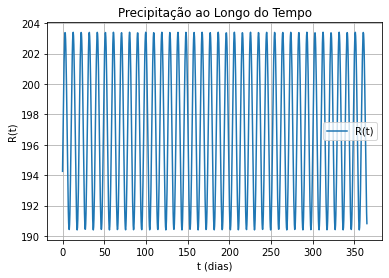

In [12]:
# Pontos no tempo
t_values = np.linspace(0, 365, 1000) # 1000 pontos entre 0 e 365
R_values = [R(t) for t in t_values]

# Plotando
plt.plot(t_values, R_values, label='R(t)')
plt.title('Precipitação ao Longo do Tempo')
plt.xlabel('t (dias)')
plt.ylabel('R(t)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Imprime os valores de a^2, l e mu
for ti, l_value, mu_value, a2_value in zip(times, l_values, mu_values, a2_values):
    print(f"Tempo: {ti}, l: {l_value}, mu: {mu_value}, \na^2: {a2_value} ")

Tempo: 0.0, l: 0.4040242302137476, mu: 0.1115841612302408, 
a^2: 5.858636955855422e-07 
Tempo: 0.000516187658023964, l: 0.40402768790501464, mu: 0.11158515057392686, 
a^2: 5.958333419098876e-07 
Tempo: 0.005678064238263603, l: 0.40406224598744783, mu: 0.11159504648368565, 
a^2: 7.001472862830438e-07 
Tempo: 0.057296830040659996, l: 0.4044058632175151, mu: 0.1116942286612625, 
a^2: 2.2038172285981025e-06 
Tempo: 0.5734844880646239, l: 0.4075736922638839, mu: 0.11268284667139707, 
a^2: 5.9885989304520785e-05 
Tempo: 4.362703093691913, l: 0.40536315564651343, mu: 0.11197834375701751, 
a^2: 1.1015555132447905e-05 
Tempo: 11.544540994584418, l: 0.4124761259632217, mu: 0.11455906894778599, 
a^2: 0.0003500476422694356 
Tempo: 19.326013180240842, l: 0.40755563709741877, mu: 0.11267679248584803, 
a^2: 5.931117770478208e-05 
Tempo: 27.23371434508911, l: 0.3978790659239856, mu: 0.11002127435498275, 
a^2: 0.00010006667428074829 
Tempo: 35.72803110961294, l: 0.3933460174312308, mu: 0.10906734430276

Cálculo do R_0:

In [14]:
# Calcula as médias
l_mean = np.mean(l_values)
mu_mean = np.mean(mu_values)
a2_mean = np.mean(a2_values)

print(f"M: {M}")
print(f"N: {N}")
print(f"Média de a^2: {a2_mean}")
print(f"Média de l: {l_mean}")
print(f"Média de mu: {mu_mean}")
print(f"b1: {b1}")
print(f"b2: {b2}")
print(f"Gamma: {gamma}")

M: 10000
N: 8558
Média de a^2: 0.00016536186496088443
Média de l: 0.40251359116300106
Média de mu: 0.11143570858522832
b1: 0.100000000000000
b2: 0.300000000000000
Gamma: 1/365


In [15]:
(M * a2_mean * b1 * b2 * l_mean) / (gamma * mu_mean * N)

0.0076424634243302085

In [16]:
(a2_mean * b1 * b2 * l_mean) / (gamma * mu_mean * N)

7.642463424330209e-07

In [17]:
n(1/3.631767265862475e-06)

275348.040442927

In [18]:
# Calcula R0 ao longo do tempo
R0_values = [(M * a2 * b1 * b2 * l) / (gamma * mu * N) for a2, l, mu in zip(a2_values, l_values, mu_values)]
R0_values

[2.714208973910167e-05,
 2.7603958349079693e-05,
 3.243654605777627e-05,
 0.00010209491716763271,
 0.002771503295222527,
 0.0005102211508055743,
 0.016126433693250303,
 0.0027449270908640327,
 0.004630263663470207,
 0.013590762885101176,
 0.012202137000279669,
 0.010393898720722074,
 0.002407077219273194,
 0.009807816079649237,
 0.01567836477865687,
 0.003806377698484655,
 0.01198780960918261,
 0.007544814968872419,
 0.005201886398069021,
 0.01620105485637211,
 0.006406857601336378,
 0.004482514519181943,
 0.014546461768965336,
 0.002480488907115928,
 0.015067012572331761,
 0.0005085922153038894,
 0.01303256942790616,
 0.0074620394895717175,
 0.006185945710916664,
 0.016091605321194306,
 9.510853381445221e-05,
 0.014752931981572293,
 0.0002994210904394186,
 0.014807260501610197,
 0.002017584593326074,
 0.016195638528257617,
 0.0007420754389259749,
 0.015497576743376828,
 0.001640324950017236,
 0.016130740087299415,
 0.0018184345426845148,
 0.008500009683879456,
 0.00951207260716699,
 0

Para aumentar o R0, será necessário aumentar o M e/ou as taxas de transmissão b1 e b2 e/ou o período de transmissiabilidade

#####################

In [19]:
T1=27.4
T2=0.025
omega1=0.67
phi1=1.53
R1=196.9
R2=-0.033
omega2=0.65
phi2=1.99
B_E=200
p_ME=0.9
p_ML=0.25
p_MP=0.75
tau_E=1
tau_P=1
c1=0.00554
c2=-0.06737
D1=36.5
b1=0.1
A=-0.03
B=1.31
C=-4.4
b2=0.3
tau_H=10
DD=105
Tmin=14.5
gamma= 1/1095 #1/365
R_L = 50
N=8558
M= 300000 #100000
I_M0=50000 # None
I_H0=1000 
if I_M0 is None:
        I_M0 = M / 100

S_H0 = N - I_H0

In [20]:
args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0)

sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, 0], args=args, dense_output=True)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 650
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x6fff31b4cc90>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.54856297e-03, 1.70341927e-02, 1.71890490e-01,
       1.72045346e+00, 4.88183116e+00, 9.20425140e+00, 1.51665821e+01,
       2.07109378e+01, 2.57265163e+01, 3.10384889e+01, 3.62473520e+01,
       4.06590219e+01, 4.50706917e+01, 4.94465571e+01, 5.38224225e+01,
       5.91674668e+01, 6.46096704e+01, 6.90155782e+01, 7.34214860e+01,
       7.77019987e+01, 8.19825113e+01, 8.73470377e+01, 9.27093120e+01,
       9.70913212e+01, 1.01473330e+02, 1.05755791e+02, 1.10038252e+02,
       1.15356597e+02, 1.21126811e+02, 1.25843562e+02, 1.30312745e+02,
       1.34924949e+02, 1.39404123e+02, 1.43744244e+02, 1.48084366e+02,
       1.52518079e+02, 1.56951791e+02, 1.62251421e+02, 1.67970682e+02,
       1.75749776e+02, 1.79864263e+02, 1.83978750

In [21]:
times = sol.t
S, I, R = sol.y

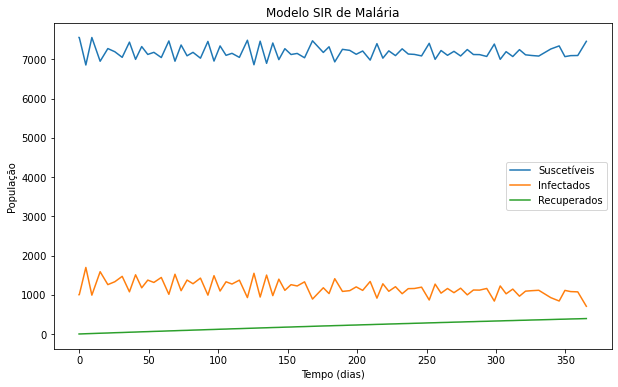

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(times, S, label='Suscetíveis')
plt.plot(times, I, label='Infectados')
plt.plot(times, R, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

In [23]:
# Calcula as médias
l_mean = np.mean(l_values)
mu_mean = np.mean(mu_values)
a2_mean = np.mean(a2_values)

print(f"M: {M}")
print(f"N: {N}")
print(f"Média de a^2: {a2_mean}")
print(f"Média de l: {l_mean}")
print(f"Média de mu: {mu_mean}")
print(f"b1: {b1}")
print(f"b2: {b2}")
print(f"Gamma: {gamma}")

# Calcula R0 ao longo do tempo
R0_values = [(M * a2 * b1 * b2 * l) / (gamma * mu * N) for a2, l, mu in zip(a2_values, l_values, mu_values)]
R0_values

M: 300000
N: 8558
Média de a^2: 0.00016536186496088443
Média de l: 0.40251359116300106
Média de mu: 0.11143570858522832
b1: 0.100000000000000
b2: 0.300000000000000
Gamma: 1/1095


[0.00244278807651915,
 0.0024843562514171727,
 0.0029192891451998645,
 0.009188542545086944,
 0.24943529657002747,
 0.0459199035725017,
 1.451379032392527,
 0.24704343817776295,
 0.4167237297123185,
 1.223168659659106,
 1.0981923300251704,
 0.9354508848649868,
 0.21663694973458741,
 0.8827034471684311,
 1.4110528300791179,
 0.342573992863619,
 1.0789028648264352,
 0.6790333471985179,
 0.46816977582621183,
 1.45809493707349,
 0.5766171841202741,
 0.4034263067263749,
 1.30918155920688,
 0.22324400164043354,
 1.3560311315098583,
 0.04577329937735004,
 1.1729312485115544,
 0.6715835540614545,
 0.5567351139824999,
 1.4482444789074875,
 0.0085597680433007,
 1.3277638783415062,
 0.026947898139547677,
 1.332653445144918,
 0.1815826133993467,
 1.4576074675431856,
 0.06678678950333773,
 1.3947819069039145,
 0.14762924550155127,
 1.4517666078569476,
 0.16365910884160637,
 0.765000871549151,
 0.856086534645029,
 0.42820943587663146,
 1.4322193120215145,
 0.0028915171118006127,
 1.421997460667757,


#####################

In [24]:
b1=0.2
b2=0.5

args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0)

sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, 0], args=args, dense_output=True)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 512
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x6fff31bbae50>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.54856297e-03, 1.70341927e-02, 1.71890490e-01,
       1.72045346e+00, 4.59683843e+00, 8.57845875e+00, 1.26018130e+01,
       1.66251672e+01, 2.15790739e+01, 2.61794180e+01, 3.02874787e+01,
       3.43955394e+01, 3.90284646e+01, 4.33535264e+01, 4.79568482e+01,
       5.26125350e+01, 5.73156271e+01, 6.20914310e+01, 6.67755405e+01,
       7.14318297e+01, 7.60979376e+01, 8.08035488e+01, 8.54848200e+01,
       9.01912735e+01, 9.48645738e+01, 9.95589683e+01, 1.04230975e+02,
       1.08935679e+02, 1.13608248e+02, 1.18311181e+02, 1.22981112e+02,
       1.27684699e+02, 1.32353829e+02, 1.37059888e+02, 1.41727826e+02,
       1.46434294e+02, 1.51100813e+02, 1.55808741e+02, 1.60474171e+02,
       1.65183377e+02, 1.69847559e+02, 1.74557846

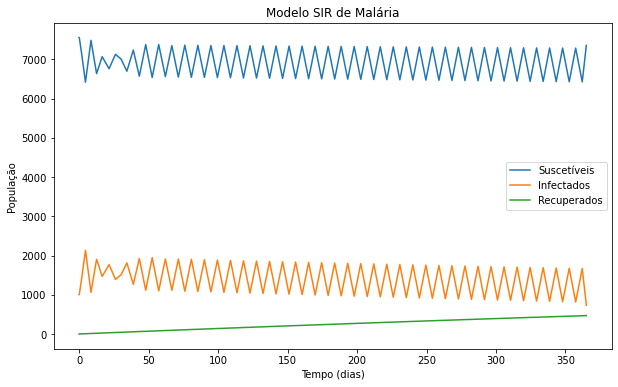

In [25]:
times = sol.t
S, I, R = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S, label='Suscetíveis')
plt.plot(times, I, label='Infectados')
plt.plot(times, R, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

In [26]:
# Calcula as médias
l_mean = np.mean(l_values)
mu_mean = np.mean(mu_values)
a2_mean = np.mean(a2_values)

print(f"M: {M}")
print(f"N: {N}")
print(f"Média de a^2: {a2_mean}")
print(f"Média de l: {l_mean}")
print(f"Média de mu: {mu_mean}")
print(f"b1: {b1}")
print(f"b2: {b2}")
print(f"Gamma: {gamma}")

# Calcula R0 ao longo do tempo
R0_values = [(M * a2 * b1 * b2 * l) / (gamma * mu * N) for a2, l, mu in zip(a2_values, l_values, mu_values)]
R0_values

M: 300000
N: 8558
Média de a^2: 0.00016536186496088443
Média de l: 0.40251359116300106
Média de mu: 0.11143570858522832
b1: 0.200000000000000
b2: 0.500000000000000
Gamma: 1/1095


[0.008142626921730501,
 0.008281187504723909,
 0.009730963817332882,
 0.030628475150289814,
 0.8314509885667581,
 0.15306634524167234,
 4.837930107975091,
 0.8234781272592098,
 1.3890790990410617,
 4.077228865530354,
 3.6606411000839016,
 3.118169616216622,
 0.7221231657819581,
 2.94234482389477,
 4.70350943359706,
 1.1419133095453968,
 3.596342882754784,
 2.263444490661726,
 1.5605659194207062,
 4.860316456911633,
 1.9220572804009135,
 1.344754355754583,
 4.363938530689601,
 0.7441466721347785,
 4.520103771699528,
 0.1525776645911668,
 3.909770828371848,
 2.2386118468715153,
 1.8557837132749995,
 4.827481596358291,
 0.02853256014433567,
 4.425879594471687,
 0.08982632713182559,
 4.442178150483059,
 0.6052753779978223,
 4.858691558477285,
 0.22262263167779242,
 4.649273023013048,
 0.4920974850051708,
 4.839222026189825,
 0.5455303628053546,
 2.5500029051638364,
 2.853621782150097,
 1.4273647862554382,
 4.774064373405048,
 0.00963839037266871,
 4.739991535559191,
 1.912874817867001,
 0.

In [27]:
T1=27.4
T2=0.025
omega1=0.02
phi1=1.53

R1=196.9
R2=0.033
omega2=0.025
phi2=1.99

In [28]:
# Funções de temperatura e chuva fora do contexto da função lotkavolterra
def T(t):
        return T1 * (1 + T2 * cos(omega1 * t - phi1))

def R(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))

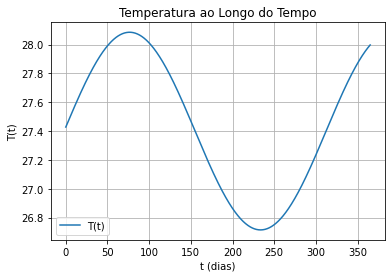

In [29]:
# Pontos no tempo
t_values = np.linspace(0, 365, 1000) # 1000 pontos entre 0 e 365
T_values = [T(t) for t in t_values]

# Plotando
plt.plot(t_values, T_values, label='T(t)')
plt.title('Temperatura ao Longo do Tempo')
plt.xlabel('t (dias)')
plt.ylabel('T(t)')
plt.legend()
plt.grid(True)
plt.show()

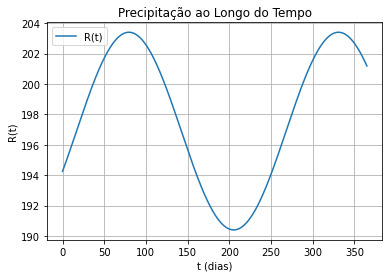

In [30]:
# Pontos no tempo
t_values = np.linspace(0, 365, 1000) # 1000 pontos entre 0 e 365
R_values = [R(t) for t in t_values]

# Plotando
plt.plot(t_values, R_values, label='R(t)')
plt.title('Precipitação ao Longo do Tempo')
plt.xlabel('t (dias)')
plt.ylabel('R(t)')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0)

sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, 0], args=args, dense_output=True)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 140
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x6fff31a89510>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.54856297e-03, 1.70341927e-02, 1.71890490e-01,
       1.72045346e+00, 1.60392597e+01, 4.32982482e+01, 6.54100485e+01,
       8.40321620e+01, 1.02654276e+02, 1.22475329e+02, 1.51667550e+02,
       1.79706599e+02, 2.21501147e+02, 2.60631068e+02, 2.97350014e+02,
       3.16680818e+02, 3.36011622e+02, 3.61411119e+02, 3.65000000e+02])
 t_events: None
        y: array([[ 7.55800000e+03,  7.55797382e+03,  7.55771094e+03,
         7.55497343e+03,  7.51679043e+03,  6.34482342e+03,
         2.64331810e+03,  8.93104369e+02,  3.24175548e+02,
         1.24430986e+02,  5.53102797e+01,  3.17621996e+01,
         4.37711840e+01,  2.54207334e+02,  2.00366799e+03,
         6.72409948e+03,  7.48595351e+03,  5.56991386e+03,
         2.21710142e+0

In [32]:
times = sol.t
S, I, R = sol.y

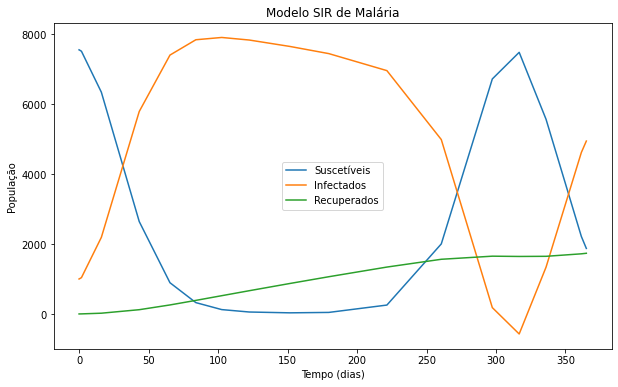

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(times, S, label='Suscetíveis')
plt.plot(times, I, label='Infectados')
plt.plot(times, R, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

In [34]:
for time, infected in zip(times, I):
    if 250 <= time <= 340:
        print(f"Tempo {time:.2f} dias: {infected:.2f} infectados")

Tempo 260.63 dias: 4990.12 infectados
Tempo 297.35 dias: 180.99 infectados
Tempo 316.68 dias: -573.18 infectados
Tempo 336.01 dias: 1339.02 infectados


In [35]:
# Calcula as médias
l_mean = np.mean(l_values)
mu_mean = np.mean(mu_values)
a2_mean = np.mean(a2_values)

print(f"M: {M}")
print(f"N: {N}")
print(f"Média de a^2: {a2_mean}")
print(f"Média de l: {l_mean}")
print(f"Média de mu: {mu_mean}")
print(f"b1: {b1}")
print(f"b2: {b2}")
print(f"Gamma: {gamma}")

# Calcula R0 ao longo do tempo
R0_values = [(M * a2 * b1 * b2 * l) / (gamma * mu * N) for a2, l, mu in zip(a2_values, l_values, mu_values)]
R0_values

M: 300000
N: 8558
Média de a^2: 0.00016536186496088443
Média de l: 0.40251359116300106
Média de mu: 0.11143570858522832
b1: 0.200000000000000
b2: 0.500000000000000
Gamma: 1/1095


[0.008142626921730501,
 0.008281187504723909,
 0.009730963817332882,
 0.030628475150289814,
 0.8314509885667581,
 0.15306634524167234,
 4.837930107975091,
 0.8234781272592098,
 1.3890790990410617,
 4.077228865530354,
 3.6606411000839016,
 3.118169616216622,
 0.7221231657819581,
 2.94234482389477,
 4.70350943359706,
 1.1419133095453968,
 3.596342882754784,
 2.263444490661726,
 1.5605659194207062,
 4.860316456911633,
 1.9220572804009135,
 1.344754355754583,
 4.363938530689601,
 0.7441466721347785,
 4.520103771699528,
 0.1525776645911668,
 3.909770828371848,
 2.2386118468715153,
 1.8557837132749995,
 4.827481596358291,
 0.02853256014433567,
 4.425879594471687,
 0.08982632713182559,
 4.442178150483059,
 0.6052753779978223,
 4.858691558477285,
 0.22262263167779242,
 4.649273023013048,
 0.4920974850051708,
 4.839222026189825,
 0.5455303628053546,
 2.5500029051638364,
 2.853621782150097,
 1.4273647862554382,
 4.774064373405048,
 0.00963839037266871,
 4.739991535559191,
 1.912874817867001,
 0.

In [36]:
B_E=200
p_ME=0.9
p_ML=0.25
p_MP=0.75
tau_E=1
tau_P=1
c1=0.00554
c2=-0.06737
D1=36.5
b1=0.1
A=-0.03
B=1.31
C=-4.4
b2=0.3
tau_H=10
DD=105
Tmin=14.5
gamma= 1/1095 #1/365
R_L = 50
N=8558
M= 300000 #100000
I_M0=50000 # None
I_H0=1000 
if I_M0 is None:
        I_M0 = M / 100

S_H0 = N - I_H0

args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0)

t_eval = np.linspace(0, 365, 1000)  # Avalia a solução em 1000 pontos entre 0 e 365
sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 191
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x6fff3168ab10>
   status: 0
  success: True
        t: array([  0.        ,   0.36536537,   0.73073073,   1.0960961 ,
         1.46146146,   1.82682683,   2.19219219,   2.55755756,
         2.92292292,   3.28828829,   3.65365365,   4.01901902,
         4.38438438,   4.74974975,   5.11511512,   5.48048048,
         5.84584585,   6.21121121,   6.57657658,   6.94194194,
         7.30730731,   7.67267267,   8.03803804,   8.4034034 ,
         8.76876877,   9.13413413,   9.4994995 ,   9.86486486,
        10.23023023,  10.5955956 ,  10.96096096,  11.32632633,
        11.69169169,  12.05705706,  12.42242242,  12.78778779,
        13.15315315,  13.51851852,  13.88388388,  14.24924925,
        14.61461461,  14.97997998,  15.34534535,  15.71071071,
        16.07607608,  16.44144144,  16.80680681,  17.17217217,
   

In [37]:
times = sol.t
S, I, R = sol.y

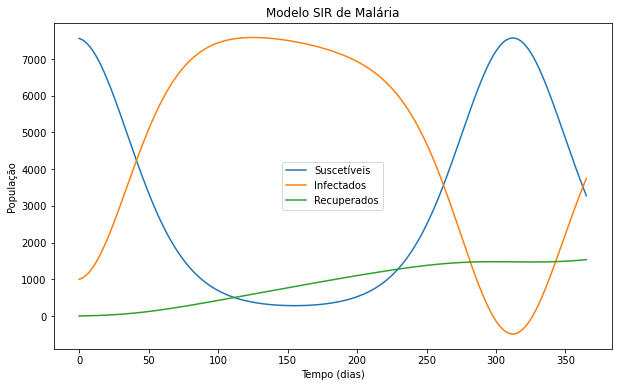

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(times, S, label='Suscetíveis')
plt.plot(times, I, label='Infectados')
plt.plot(times, R, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

#####################

In [39]:
# Inicializando os parâmetros
num_steps = 365
dt = 1
t_initial = 0
t_final = num_steps * dt
T1 = 27.4
T2 = 0.025
omega1 = 0.67
phi1 = 1.53
R1 = 196.9
R2 = -0.033
omega2 = 0.65
phi2 = 1.99
B_E = 200
p_ME = 0.9
p_ML = 0.25
p_MP = 0.75
tau_E = 1
tau_P = 1
c1 = 0.00554
c2 = -0.06737
D1 = 36.5
b1 = 0.04
A = -0.03
B = 1.31
C = -4.4
b2 = 0.09
tau_H = 10
DD = 105
Tmin = 14.5
gamma = 1/120
R_L = 50
N = 8558
M = 10000
I_M0 = 5000 # None
I_H0 = 1000
if I_M0 is None:
        I_M0 = M / 100
S_H0 = N - I_H0

In [40]:
# Definindo funções auxiliares
def T(t):
    return T1 * (1 + T2 * cos(omega1 * t - phi1))

def R(t):
    return R1 * (1 + R2 * cos(omega2 * t - phi2))

def tau_L(T):
    return 1 / (c1 * T + c2)

def p(T):
    return np.exp(-1 / (A*T**2 + B*T + C))

def p_LT(T):
    return np.exp(-(c1 * T + c2))

def p_LR(R):
    return (4*p_ML/R_L**2) * R * (R_L - R)

def p_LRT(R,T):
    return p_LR(R)*p_LT(T)

def tau_M(T):
    return DD / (T - Tmin)

def l(tau_M, T):  
    p_T = p(T)
    return p_T**tau_M

def mu(T):
    return -np.log(p(T))

In [41]:
# Definindo a função do sistema de equações diferenciais
def diff(t, Y):
    S_H, I_H, R_H = Y
    T_curr = T(t)
    R_curr = R(t)
    tau_M_T = tau_M(T_curr)
    l_tau_M = l(tau_M_T, T_curr)
    a = (T_curr - T1) / D1
    b = B_E * p_ME * p_LRT(R_curr, T_curr) * p_MP / (tau_E + tau_L(T_curr) + tau_P)

    if t < tau_H:
        dS_H = -a * b2 * (I_M0 / N) * S_H
        dI_H = a * b2 * (I_M0 / N) * S_H - gamma * I_H
    else:
        dS_H = -a * b2 * (I_H / N) * S_H
        dI_H = a * b2 * (I_H / N) * S_H - gamma * I_H
    dR_H = gamma * I_H

    return [dS_H, dI_H, dR_H]

In [42]:
# Solucionando o sistema de equações diferenciais
sol = solve_ivp(diff, [t_initial, t_final], [S_H0, I_H0, 0], t_eval=np.linspace(t_initial, t_final, num_steps))

In [43]:
# Extraindo as soluções
times = sol.t
S_H, I_H, R_H = sol.y

In [44]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 134
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.        ,   1.00274725,   2.00549451,   3.00824176,
         4.01098901,   5.01373626,   6.01648352,   7.01923077,
         8.02197802,   9.02472527,  10.02747253,  11.03021978,
        12.03296703,  13.03571429,  14.03846154,  15.04120879,
        16.04395604,  17.0467033 ,  18.04945055,  19.0521978 ,
        20.05494505,  21.05769231,  22.06043956,  23.06318681,
        24.06593407,  25.06868132,  26.07142857,  27.07417582,
        28.07692308,  29.07967033,  30.08241758,  31.08516484,
        32.08791209,  33.09065934,  34.09340659,  35.09615385,
        36.0989011 ,  37.10164835,  38.1043956 ,  39.10714286,
        40.10989011,  41.11263736,  42.11538462,  43.11813187,
        44.12087912,  45.12362637,  46.12637363,  47.12912088,
        48.13186813,  49.13461538,  50.13736264,  51.14010989,
  

In [45]:
times

array([  0.        ,   1.00274725,   2.00549451,   3.00824176,
         4.01098901,   5.01373626,   6.01648352,   7.01923077,
         8.02197802,   9.02472527,  10.02747253,  11.03021978,
        12.03296703,  13.03571429,  14.03846154,  15.04120879,
        16.04395604,  17.0467033 ,  18.04945055,  19.0521978 ,
        20.05494505,  21.05769231,  22.06043956,  23.06318681,
        24.06593407,  25.06868132,  26.07142857,  27.07417582,
        28.07692308,  29.07967033,  30.08241758,  31.08516484,
        32.08791209,  33.09065934,  34.09340659,  35.09615385,
        36.0989011 ,  37.10164835,  38.1043956 ,  39.10714286,
        40.10989011,  41.11263736,  42.11538462,  43.11813187,
        44.12087912,  45.12362637,  46.12637363,  47.12912088,
        48.13186813,  49.13461538,  50.13736264,  51.14010989,
        52.14285714,  53.1456044 ,  54.14835165,  55.1510989 ,
        56.15384615,  57.15659341,  58.15934066,  59.16208791,
        60.16483516,  61.16758242,  62.17032967,  63.17

In [46]:
S_H, I_H, R_H

(array([7558.        , 7555.30041575, 7548.94299274, 7541.67081969,
        7536.66829233, 7535.8513207 , 7539.54329438, 7546.47508244,
        7553.78503346, 7557.72876088, 7558.52908797, 7557.68699458,
        7556.32084095, 7555.22150943, 7554.85240445, 7555.34945249,
        7556.52110215, 7557.84784019, 7558.25313645, 7557.60231086,
        7556.38437436, 7554.99661471, 7553.74459649, 7552.84216112,
        7552.41142681, 7552.48278862, 7552.99491841, 7553.7947649 ,
        7554.63755358, 7555.18678682, 7555.01424376, 7554.14370499,
        7554.00082693, 7554.49204348, 7555.40529965, 7556.55819694,
        7557.7979934 , 7559.00160355, 7560.07559846, 7560.95620568,
        7561.60930931, 7562.03044993, 7562.24482466, 7562.30728711,
        7562.30234741, 7562.34417222, 7562.57658469, 7563.03099589,
        7563.53451717, 7564.00715402, 7564.38457161, 7564.6174112 ,
        7564.67129008, 7564.52680163, 7564.17951528, 7563.63997654,
        7562.93370699, 7562.10120426, 7561.19794

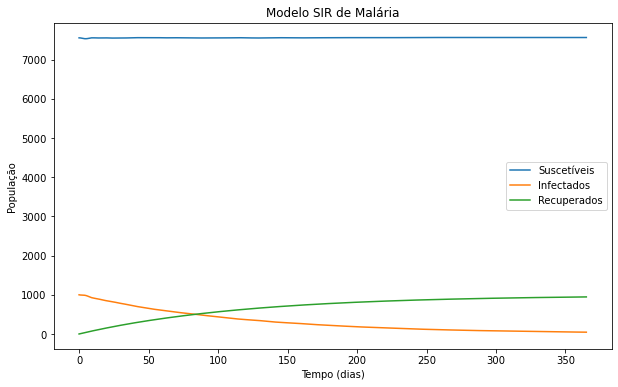

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()